<a href="https://colab.research.google.com/github/asaadkhan21/Machine_Learning_And_Data_Sceince__With_Python/blob/main/AnalyzingCrimes_in_LA_DatacampProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0.0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27.0,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60.0,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28.0,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37.0,M,H,NaN,Invest Cont,6200 4TH AV


# Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour.

In [7]:
crimes["HOUR OCC"] = crimes["TIME OCC"].str[:2].astype(int)
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR OCC
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0.0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR,17
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27.0,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60.0,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28.0,M,H,NaN,Invest Cont,1900 TRANSIENT,12
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37.0,M,H,NaN,Invest Cont,6200 4TH AV,6


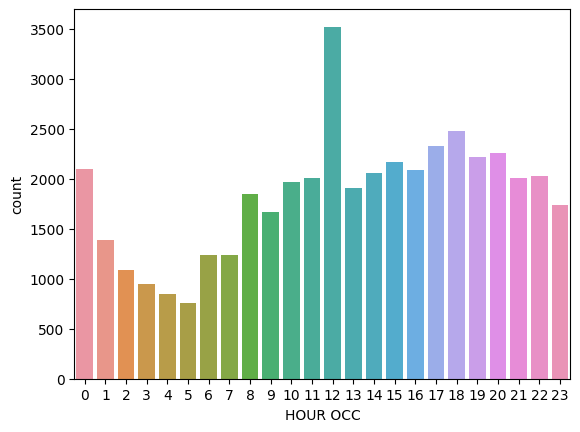

In [8]:
sns.countplot(data=crimes, x="HOUR OCC")
plt.show()


In [26]:
peak_crime_hour=crimes["HOUR OCC"].value_counts().index[0]
peak_crime_hour

12

# Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called peak_night_crime_location.

In [17]:
# Filter crimes for night hours (10 PM to 4 AM)
night_time = crimes[crimes["HOUR OCC"].between(22, 23) | crimes["HOUR OCC"].between(0, 3)]

# Check if there are any rows in the filtered DataFrame
if not night_time.empty:
    # Find the area with the highest number of crimes during night hours
    peak_night_crime_location = night_time["AREA NAME"].value_counts().idxmax()
    print("Peak night crime location:", peak_night_crime_location)
else:
    print("No crimes during specified night hours.")



Peak night crime location: Central


# Identify the number of crimes committed against victims by age group (<18, 18-25, 26-34, 35-44, 45-54, 55-64, 65+). Save as a pandas Series called victim_ages.

**pd.cut function sample**

In [22]:
import pandas as pd

# Sample data
ages = [15, 22, 30, 40, 50, 60, 70]

# Define bins and labels
bins = [0, 18, 35, 50, 100]
labels = ["<18", "18-35", "36-50", "51+"]

# Apply pd.cut to create a new column
age_categories = pd.cut(ages, bins=bins, labels=labels)

# Display the result
print(age_categories)


['<18', '18-35', '18-35', '36-50', '36-50', '51+', '51+']
Categories (4, object): ['<18' < '18-35' < '36-50' < '51+']


In [23]:
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["<18", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Add a new column using pd.cut() to bin values into discrete intervals
crimes["Age Bracket"] = pd.cut(crimes["Vict Age"],
                               bins=age_bins,
                               labels=age_labels)
crimes.head(5)
victim_ages = crimes["Age Bracket"].value_counts()

# Print the result
print(victim_ages)

26-34    8508
35-44    7700
45-54    5146
18-25    5082
55-64    3755
65+      2599
<18       813
Name: Age Bracket, dtype: int64
